Plant Species Detection

## importing libraries

In [5]:
import tensorflow as tf
from zipfile import ZipFile
import matplotlib.pyplot as plt
import os,glob
import cv2
import shutil
import os
import random
from zipfile import ZipFile as zipfile
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile

<ipython-input-5-19eb5915ca7a>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


## Data Loading

In [8]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 71 bytes


In [9]:
!kaggle datasets download -d syedabdullahsaad/plant-species

100% 4.19G/4.19G [00:52<00:00, 148MB/s]
100% 4.19G/4.19G [00:52<00:00, 85.5MB/s]


In [43]:
from zipfile import ZipFile
import os

# Define the path to the ZIP archive.
file_name = "/content/plant-species.zip"

# Create a target directory for extraction.
target_directory = "/content/all_species_data"
if not os.path.exists(target_directory):
    os.makedirs(target_directory)

# Open the ZIP archive and extract all species data.
with ZipFile(file_name, 'r') as zip:
    # Extract all contents from the ZIP archive to the target directory.
    zip.extractall(target_directory)

print('Done')


Done


In [ ]:
from zipfile import ZipFile
import os

# Define the path to the ZIP archive.
file_name = "/content/plant-species.zip"

# Create a target directory for extraction.
target_directory = "/content/all_species_data"
if not os.path.exists(target_directory):
    os.makedirs(target_directory)

# Open the ZIP archive and extract all species data.
with ZipFile(file_name, 'r') as zip:
    # Extract all contents from the ZIP archive to the target directory.
    zip.extractall(target_directory)

print('Done')


In [49]:


# Define the path to the directory where the species folders are located.
directory_path = '/content/all_species_data/train_a_tensorflow-lite_model_for_identifying_plant_species/train/images'

# List the species names in the specified directory.
species_names = os.listdir(directory_path)

# Filter out only subdirectories (species names).
species_names = [name for name in species_names if os.path.isdir(os.path.join(directory_path, name))]

# Print the list of species names.
print("Species available in the directory:")
for species_name in species_names:
    print(species_name)


Species available in the directory:
daucus carota l
cephalanthus occidentalis l
liriodendron tulipifera l
iris pseudacorus l
toxicodendron radicans (l.) kuntze
urtica dioica l
platanus racemosa nutt
sassafras albidum (nutt.) nees
maianthemum racemosum (l.) link
baccharis caerulescens dc
acer negundo l
fagus grandifolia ehrh
drosera rotundifolia l
helminthotheca echioides (l.) holub
tussilago farfara l
scrophularia multiflora pennell
abies balsamea (l.) mill
datura wrightii regel
duchesnea indica (jacks.) focke
toxylon pomiferum raf
prosopis glandulosa torr
chamaecrista fasciculata (michx.) greene
asplenium bulbiferum g. forst
solanum laciniatum aiton
juniperus virginiana l
maianthemum canadense desf
ficaria verna huds
magnolia grandiflora l
heracleum maximum w. bartram
juniperus occidentalis hook
syrmatium glabrum vogel
erythronium americanum ker gawl
marrubium vulgare l
platanus occidentalis l
carduus occidentalis nutt
cornus florida l
liquidambar styraciflua l
sanguinaria canadensis 

In [42]:
species_name

'acer macrophyllum pursh/'

In [53]:
import os
import shutil

# Define the source directory where all species folders are located.
source_directory = '/content/all_species_data/train_a_tensorflow-lite_model_for_identifying_plant_species/train/images'

# Define the target directory where you want to extract the selected species.
target_directory = '/content/drive/MyDrive/five_species'

# Define the list of specific species you want to extract.
selected_species = [
    "acer macrophyllum pursh/",
    "cornus florida l/",
    "juniperus occidentalis hook/",
    "liriodendron tulipifera l/",
    "trifolium repens l/"
]

# Create the target directory if it doesn't exist.
if not os.path.exists(target_directory):
    os.makedirs(target_directory)

# Iterate through the selected species and extract them to the target directory.
for species_name in selected_species:
    source_path = os.path.join(source_directory, species_name)
    target_path = os.path.join(target_directory, species_name)

    if os.path.exists(source_path):
        shutil.copytree(source_path, target_path)

print('Extraction of selected species is complete.')



Extraction of selected species is complete.


In [20]:
np.random.seed(42)

## EDA

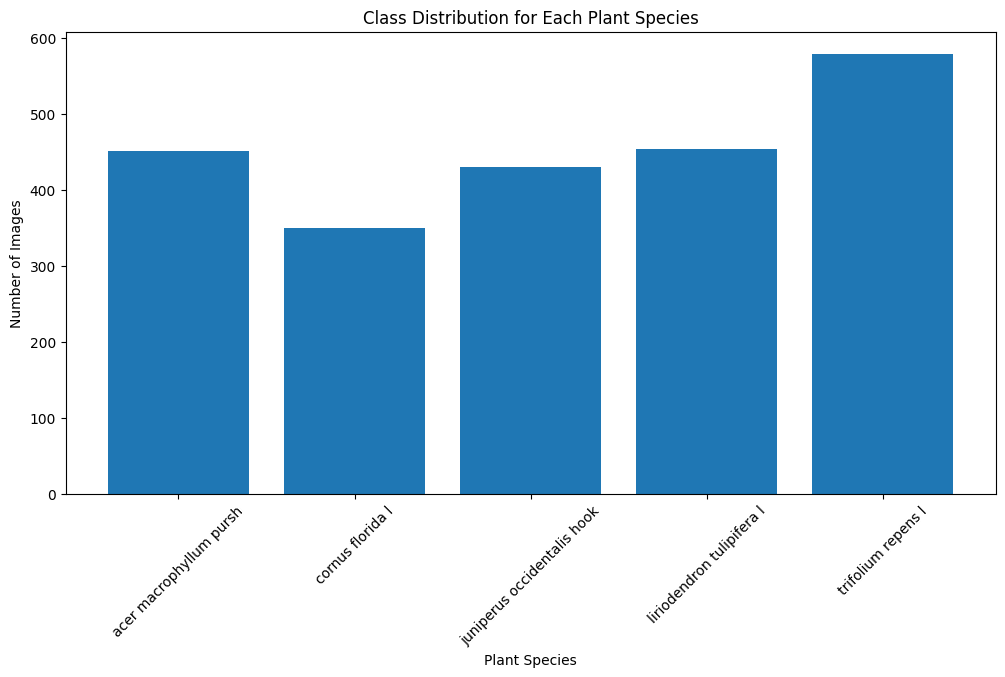

In [54]:


# Define the path to the directory containing the species folders.
data_directory = '/content/drive/MyDrive/five_species'

# Get a list of plant species folders.
species_folders = os.listdir(data_directory)

# Initialize dictionaries to store species names and counts.
species_counts = {}
species_names = []

# Iterate through each species folder and count the images.
for species_folder in species_folders:
    species_name = species_folder
    species_names.append(species_name)
    species_path = os.path.join(data_directory, species_folder)
    image_count = len([file for file in os.listdir(species_path) if file.endswith(('.jpg', '.jpeg', '.png'))])
    species_counts[species_name] = image_count

# Plot the class distribution.
plt.figure(figsize=(12, 6))
plt.bar(species_names, species_counts.values())
plt.title('Class Distribution for Each Plant Species')
plt.xlabel('Plant Species')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()


In [55]:
species_folders

['acer macrophyllum pursh',
 'cornus florida l',
 'juniperus occidentalis hook',
 'liriodendron tulipifera l',
 'trifolium repens l']

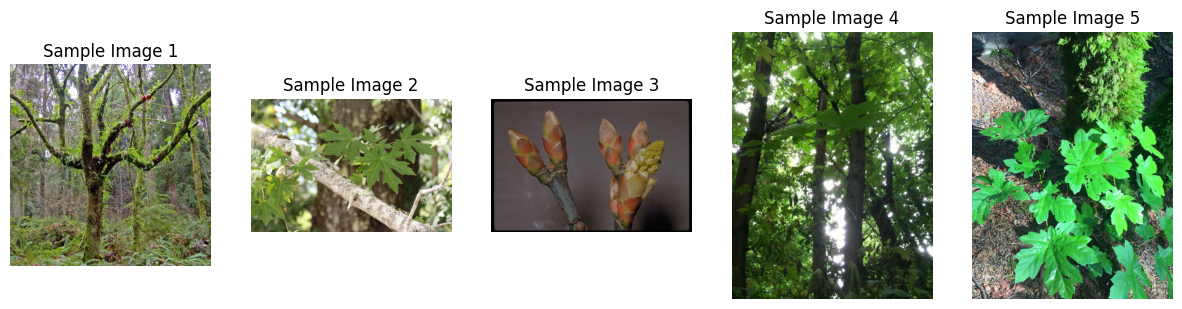

In [64]:
# acer macrophyllum pursh

# Define the path to the directory containing the images.
image_directory = '/content/drive/MyDrive/five_species/acer macrophyllum pursh'

# List all image files in the directory.
image_files = [os.path.join(image_directory, filename) for filename in os.listdir(image_directory) if filename.endswith(('.jpg', '.jpeg', '.png'))]

# Define the number of sample images to display.
num_samples = 5

# Randomly select and display sample images.
sample_images = random.sample(image_files, num_samples)

plt.figure(figsize=(15, 5))  # Set the figure size for the plot.

for i, image_file in enumerate(sample_images):
    image = cv2.imread(image_file)
    if image is not None:
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f'Sample Image {i + 1}')
        plt.axis('off')
    else:
        print(f"Failed to load image {image_file}")

plt.show()


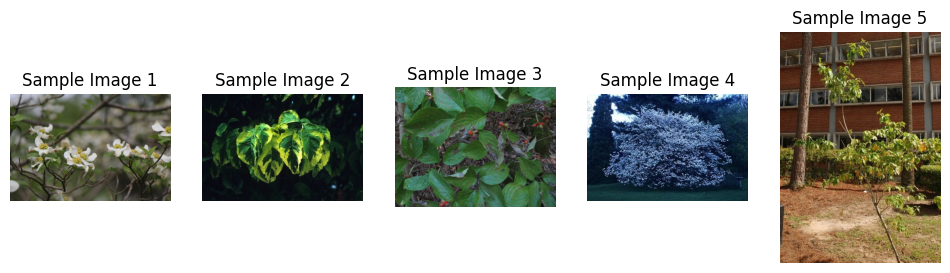

In [68]:
## cornus florida l

folder_path = '/content/drive/MyDrive/five_species/cornus florida l'
image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.jpg', '.jpeg', '.png'))]

# Display a few sample images.
plt.figure(figsize=(12, 6))
for i in range(5):
    image = cv2.imread(image_files[i])
    plt.subplot(1, 5, i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Sample Image {i+1}')
    plt.axis('off')
plt.show()


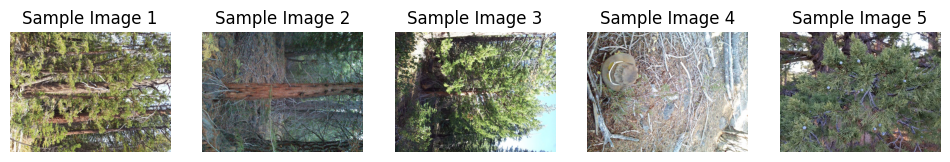

In [65]:
# juniperus occidentalis hook

folder_path = '/content/drive/MyDrive/five_species/juniperus occidentalis hook'
# List all image files in the folder.
image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.jpg', '.jpeg', '.png'))]

# Display a few sample images.
plt.figure(figsize=(12, 6))
for i in range(5):
    image = cv2.imread(image_files[i])
    plt.subplot(1, 5, i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Sample Image {i+1}')
    plt.axis('off')
plt.show()

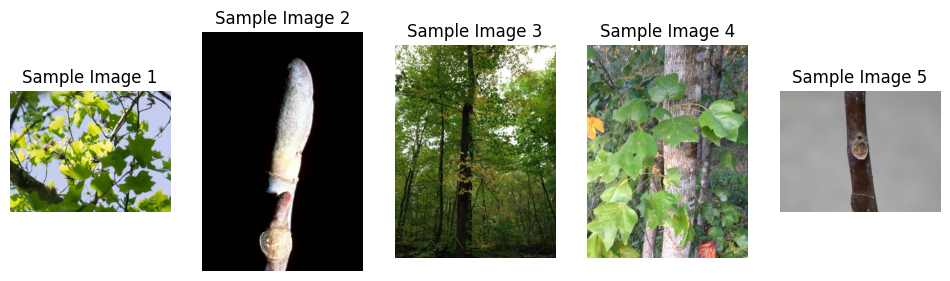

In [66]:
#  liriodendron  tulipifera l
folder_path = '/content/drive/MyDrive/five_species/liriodendron tulipifera l'
image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.jpg', '.jpeg', '.png'))]

# Display a few sample images.
plt.figure(figsize=(12, 6))
for i in range(5):
    image = cv2.imread(image_files[i])
    plt.subplot(1, 5, i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Sample Image {i+1}')
    plt.axis('off')
plt.show()

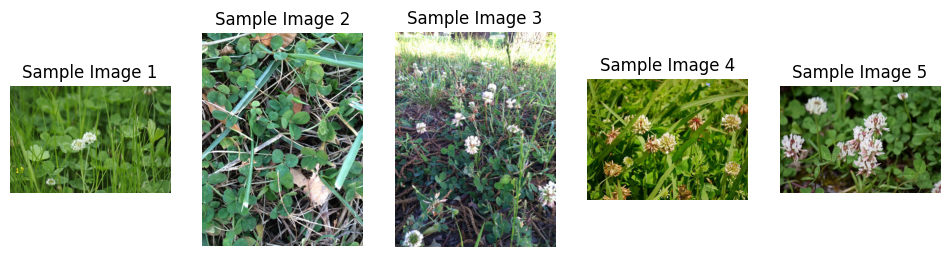

In [67]:
#  trifolium repens l
folder_path = '/content/drive/MyDrive/five_species/trifolium repens l'

image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.jpg', '.jpeg', '.png'))]

# Display a few sample images.
plt.figure(figsize=(12, 6))
for i in range(5):
    image = cv2.imread(image_files[i])
    plt.subplot(1, 5, i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Sample Image {i+1}')
    plt.axis('off')
plt.show()

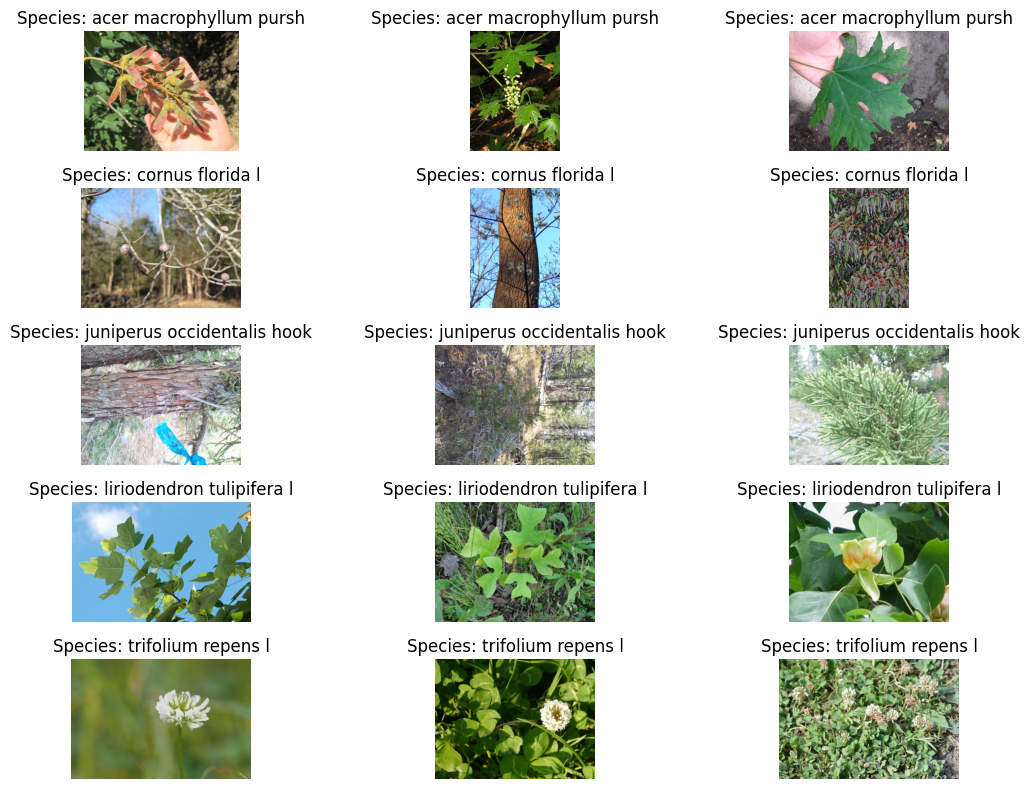

In [69]:
#  list of plant species folders.
species_folders = os.listdir(data_directory)

# number of sample images to display
num_samples = 3

rows = len(species_folders)
cols = num_samples

# figure and axes for displaying the images.
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

# Iterate through each species folder and display sample images.
for i, species_folder in enumerate(species_folders):
    species_path = os.path.join(data_directory, species_folder)
    image_files = [file for file in os.listdir(species_path) if file.endswith(('.jpg', '.jpeg', '.png'))]

    # Randomly select num_samples images from the folder.
    selected_images = random.sample(image_files, num_samples)

    for j, image_file in enumerate(selected_images):
        image_path = os.path.join(species_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Display the image on the corresponding subplot.
        axes[i, j].imshow(image)
        axes[i, j].set_title(f'Species: {species_folder}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()


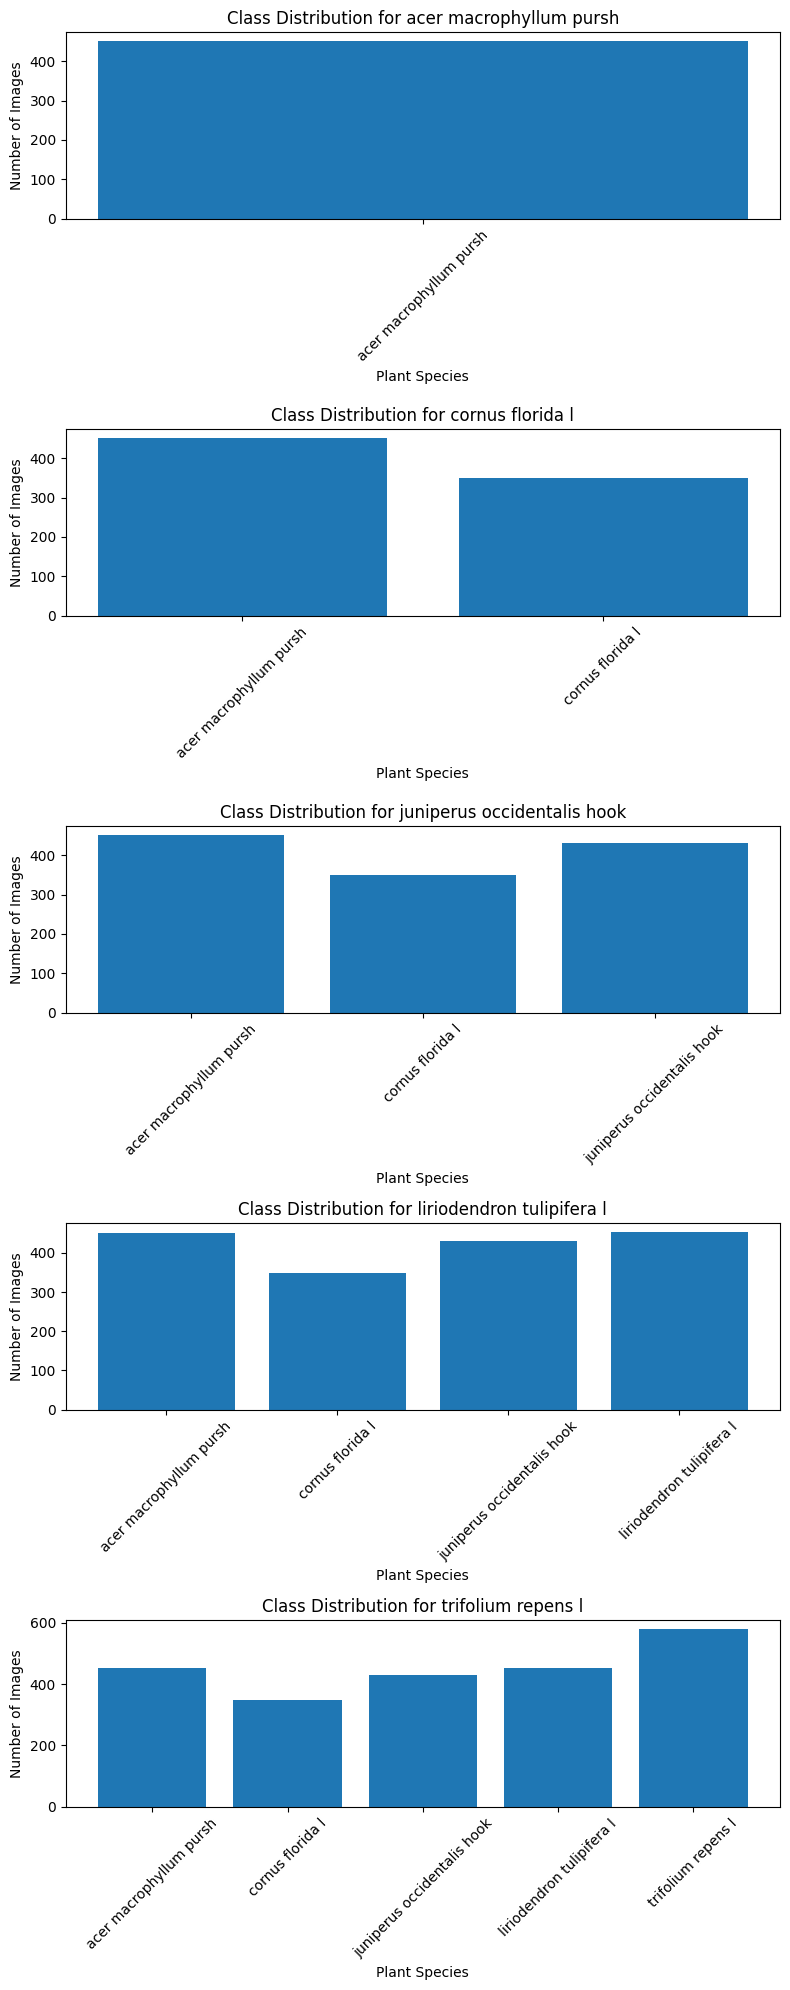

In [70]:
species_folders = os.listdir(data_directory)

# Initialize dictionaries to store species names and counts.
species_counts = {}

rows = len(species_folders)
cols = 1

# figure and axes for displaying the class distribution plots.
fig, axes = plt.subplots(rows, cols, figsize=(8, 4 * rows))

# Iterate through each species folder and calculate the class distribution.
for i, species_folder in enumerate(species_folders):
    species_path = os.path.join(data_directory, species_folder)
    image_files = [file for file in os.listdir(species_path) if file.endswith(('.jpg', '.jpeg', '.png'))]

    # Count the number of images for each species.
    species_counts[species_folder] = len(image_files)

    # Plot the class distribution for the current species folder.
    axes[i].bar(species_counts.keys(), species_counts.values())
    axes[i].set_title(f'Class Distribution for {species_folder}')
    axes[i].set_xlabel('Plant Species')
    axes[i].set_ylabel('Number of Images')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()





In [71]:
species_folders

['acer macrophyllum pursh',
 'cornus florida l',
 'juniperus occidentalis hook',
 'liriodendron tulipifera l',
 'trifolium repens l']

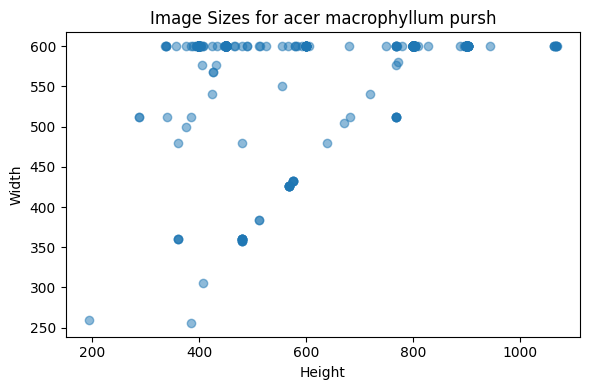

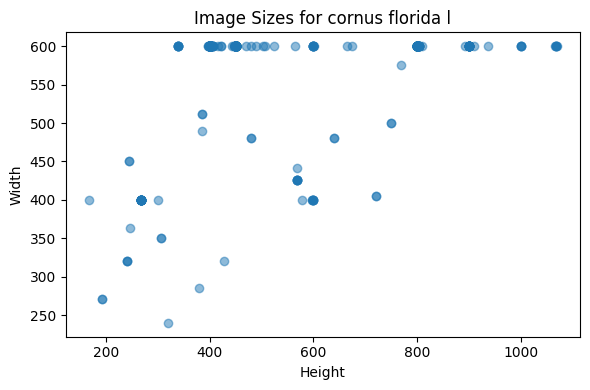

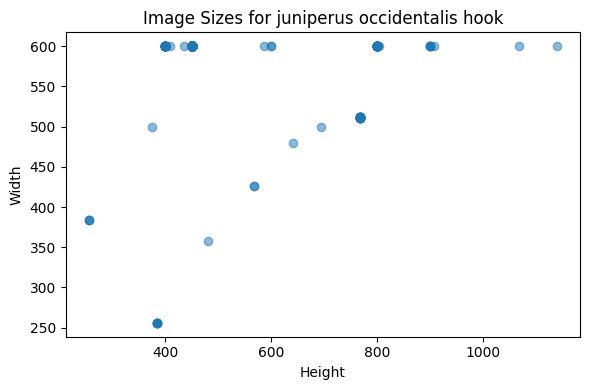

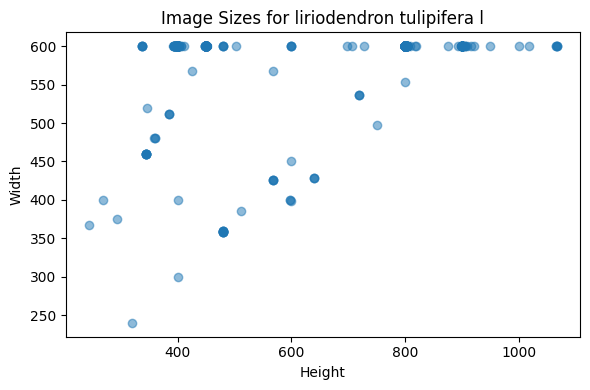

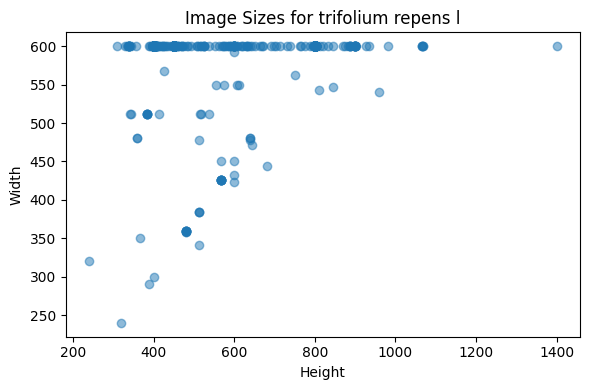

In [72]:
#Image stastics

# Get a list of plant species folders.
species_folders = os.listdir(data_directory)

# Iterate through each species folder and calculate image sizes.
for species_folder in species_folders:
    species_path = os.path.join(data_directory, species_folder)
    image_files = [file for file in os.listdir(species_path) if file.endswith(('.jpg', '.jpeg', '.png'))]

    # Initialize lists to store image sizes for each species.
    heights, widths = [], []

    for image_file in image_files:
        image_path = os.path.join(species_path, image_file)
        image = cv2.imread(image_path)

        # Get image size (height and width).
        height, width, _ = image.shape
        heights.append(height)
        widths.append(width)

    # Visualize image sizes for the current species folder.
    plt.figure(figsize=(6, 4))
    plt.scatter(heights, widths, alpha=0.5)
    plt.title(f'Image Sizes for {species_folder}')
    plt.xlabel('Height')
    plt.ylabel('Width')

    plt.tight_layout()
    plt.show()



In [73]:
image_file

'364840.jpg'

In [ ]:
folder_path

In [ ]:
data_directory

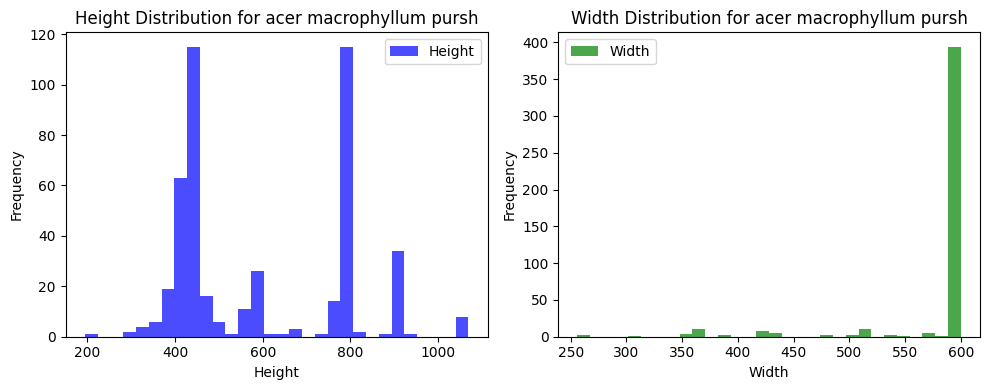

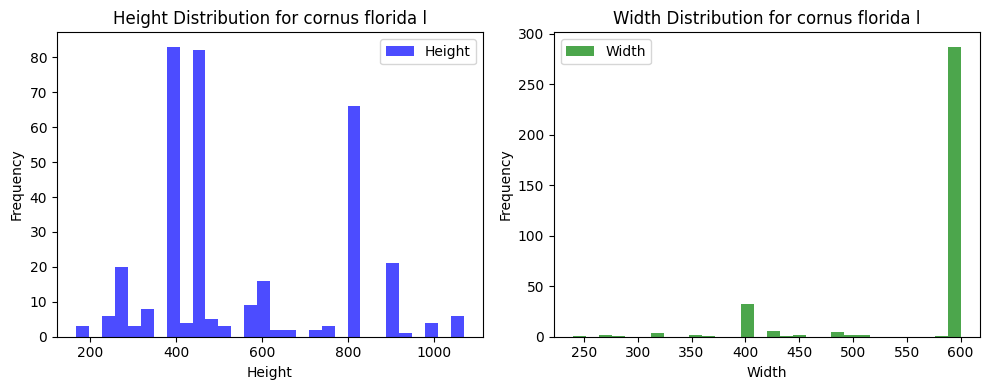

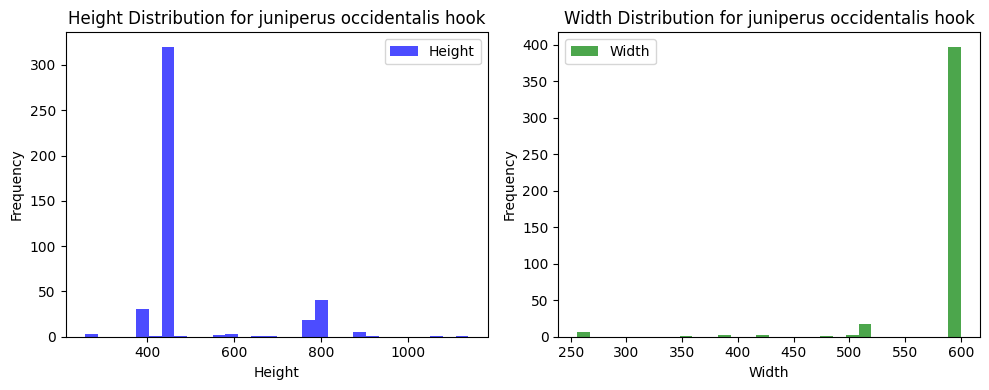

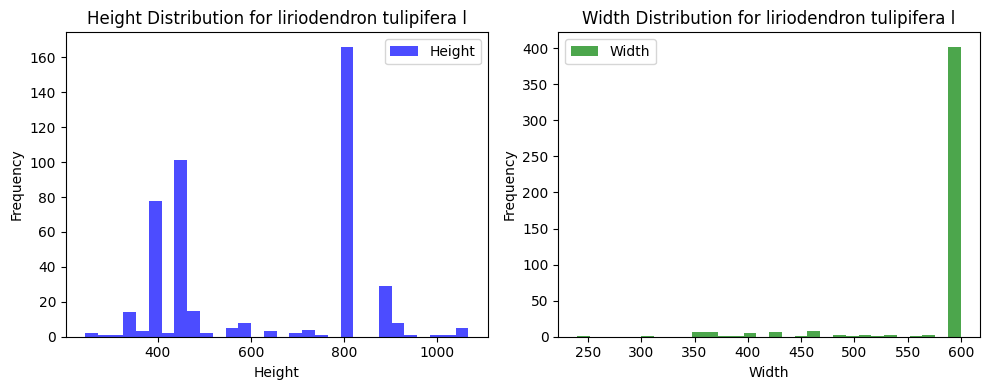

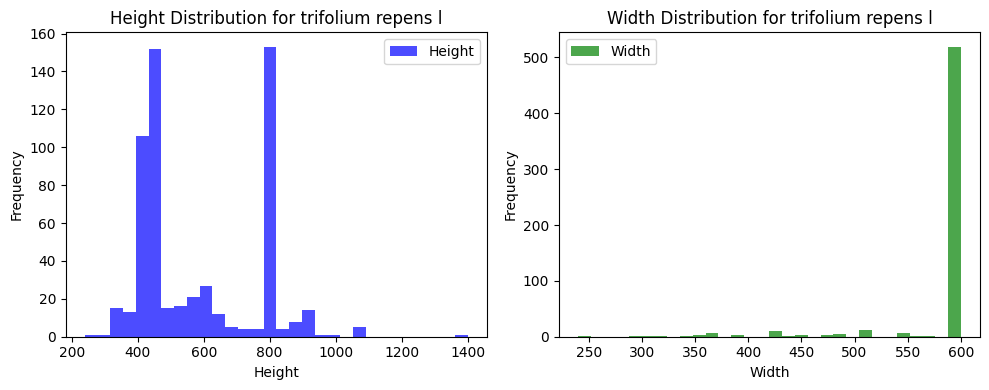

In [74]:
# Iterate through each species folder and calculate and visualize image sizes.
for species_folder in species_folders:
    species_path = os.path.join(data_directory, species_folder)
    image_files = [file for file in os.listdir(species_path) if file.endswith(('.jpg', '.jpeg', '.png'))]

    # Initialize lists to store image sizes for each species.
    heights, widths = [], []

    for image_file in image_files:
        image_path = os.path.join(species_path, image_file)
        image = cv2.imread(image_path)

        # Get image size (height and width).
        height, width, _ = image.shape
        heights.append(height)
        widths.append(width)

    # Visualize the distribution of image sizes for the current species folder.
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(heights, bins=30, color='b', alpha=0.7, label='Height')
    plt.title(f'Height Distribution for {species_folder}')
    plt.xlabel('Height')
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(widths, bins=30, color='g', alpha=0.7, label='Width')
    plt.title(f'Width Distribution for {species_folder}')
    plt.xlabel('Width')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()


## Data preprocessing

In [75]:
data_directory

'/content/drive/MyDrive/five_species'

In [89]:

import shutil

# data_directory = 'path_to_data_directory'

# Define the path to the directory where you want to create the train, test, and validation folders.
split_data_directory = '/content/drive/MyDrive/Training_species'
os.makedirs(split_data_directory, exist_ok=True)

# Get a list of the five plant species folders.
species_folders = os.listdir(data_directory)[:5]  # Limit to the first five species.

# Define the percentage splits for train, test, and validation.
train_split = 0.6  # 60% for training
test_split = 0.2   # 20% for testing
val_split = 0.2    # 20% for validation

# Iterate through each of the five species folders and split the data.
for species_folder in species_folders:
    species_path = os.path.join(data_directory, species_folder)

    # Create train, test, and validation directories for each species.
    train_dir = os.path.join(split_data_directory, 'train', species_folder)
    test_dir = os.path.join(split_data_directory, 'test', species_folder)
    val_dir = os.path.join(split_data_directory, 'val', species_folder)

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    # List all image files in the current species folder.
    image_files = [file for file in os.listdir(species_path) if file.endswith(('.jpg', '.jpeg', '.png'))]

    # Use train_test_split to split the data into train, test, and validation sets.
    train_files, test_val_files = train_test_split(image_files, test_size=(test_split + val_split), random_state=42)
    test_files, val_files = train_test_split(test_val_files, test_size=(val_split / (test_split + val_split)), random_state=42)

    # Copy images to the corresponding directories.
    for file in train_files:
        src = os.path.join(species_path, file)
        dst = os.path.join(train_dir, file)
        shutil.copy(src, dst)

    for file in test_files:
        src = os.path.join(species_path, file)
        dst = os.path.join(test_dir, file)
        shutil.copy(src, dst)

    for file in val_files:
        src = os.path.join(species_path, file)
        dst = os.path.join(val_dir, file)
        shutil.copy(src, dst)



In [90]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define an ImageDataGenerator for data augmentation.
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=40,  # Randomly rotate images by up to 40 degrees
    width_shift_range=0.2,  # Randomly shift image width by up to 20%
    height_shift_range=0.2,  # Randomly shift image height by up to 20%
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Randomly zoom in by up to 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill mode for newly created pixels
)


In [91]:
# import tensorflow as tf

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

# Define the number of classes (plant species) in your dataset.
num_classes = 5

# Define the input size expected by VGG-16.
input_shape = (224, 224, 3)

# Load the VGG-16 base model (excluding the top classification layers).
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom top classification layers for your specific task.
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # You can adjust the number of units as needed.
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final VGG-16 model.
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with an optimizer, loss function, and evaluation metric.
model.compile(optimizer=SGD(lr=0.001, momentum=0.9),  # Adjust learning rate as needed.
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display a summary of the model architecture.
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [92]:
# Define the loss function, optimizer, and evaluation metrics for model compilation.
model.compile(optimizer=SGD(lr=0.001, momentum=0.9),  # Adjust learning rate as needed.
              loss='categorical_crossentropy',  # For multi-class classification.
              metrics=['accuracy'])  # You can add more metrics if needed.

# Display a summary of the model architecture.
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [93]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters (optional).
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    rescale=1.0 / 255.0  # Rescale pixel values to the range [0, 1]
)

# Define the image dimensions you want to use.
image_height = 224  # Replace with the desired height
image_width = 224  # Replace with the desired width

# Create a data generator for the training set.
train_generator = data_augmentation.flow_from_directory(
    '/content/drive/MyDrive/Training_species',
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)




Found 2262 images belonging to 3 classes.


In [100]:
# Define data augmentation parameters (optional).
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    rescale=1.0 / 255.0
)

# batch_size=

# Define the image dimensions you want to use.
image_height = 224
image_width = 224

# Create data generators for the training
train_generator = data_augmentation.flow_from_directory(
    '/content/drive/MyDrive/Training_species/train',
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)


# Create a data for validation

validation_generator = data_augmentation.flow_from_directory(
    '/content/drive/MyDrive/Training_species/val',
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Create a data generator for the test set.
test_generator = data_augmentation.flow_from_directory(
    '/content/drive/MyDrive/Training_species/test',
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False for test data
)


Found 1355 images belonging to 5 classes.
Found 454 images belonging to 5 classes.
Found 453 images belonging to 5 classes.


In [102]:
# training epochs.
num_epochs = 11

# batch size for training.
batch_size = 32


# training model on  training set  validation set.
history = model.fit(
    train_generator,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=validation_generator,
    verbose=1
)


#  save the trained model
# model.save('species_vgg16.h5')


Epoch 1/11
43/43 [==============================] - 39s 910ms/step - loss: 1.5977 - accuracy: 0.2561 - val_loss: 1.5965 - val_accuracy: 0.2555
Epoch 2/11
43/43 [==============================] - 36s 846ms/step - loss: 1.5978 - accuracy: 0.2561 - val_loss: 1.5965 - val_accuracy: 0.2555
Epoch 3/11
43/43 [==============================] - 39s 902ms/step - loss: 1.5978 - accuracy: 0.2561 - val_loss: 1.5964 - val_accuracy: 0.2555
Epoch 4/11
43/43 [==============================] - 37s 857ms/step - loss: 1.5978 - accuracy: 0.2561 - val_loss: 1.5965 - val_accuracy: 0.2555
Epoch 5/11
43/43 [==============================] - 37s 863ms/step - loss: 1.5974 - accuracy: 0.2561 - val_loss: 1.5967 - val_accuracy: 0.2555
Epoch 6/11
43/43 [==============================] - 38s 878ms/step - loss: 1.5979 - accuracy: 0.2561 - val_loss: 1.5965 - val_accuracy: 0.2555
Epoch 7/11
43/43 [==============================] - 36s 843ms/step - loss: 1.5975 - accuracy: 0.2561 - val_loss: 1.5965 - val_accuracy: 0.2555

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [106]:
# Evaluate the model on the test set.
test_loss, test_accuracy = model.evaluate(test_generator)  # Replace with your test data generator.

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


15/15 [==============================] - 8s 492ms/step - loss: 1.5964 - accuracy: 0.2561
Test Accuracy: 25.61%
Test Loss: 1.5964


In [107]:
from tensorflow.keras.preprocessing import image

# Define a function to load and preprocess a new image.
def load_and_preprocess_new_image(image_path, target_size=(224, 224)):
    img = image.load_img(image_path, target_size=target_size)
    img = image.img_to_array(img)
    img = img / 255.0  # Rescale pixel values to the range [0, 1]
    return img

In [108]:
import numpy as np

# Assuming you have a new image you want to classify.
new_image = load_and_preprocess_new_image('/content/drive/MyDrive/Training_species/train/cornus florida l/187325.jpg')
# Perform prediction on the new image.
predictions = model.predict(np.array([new_image]))

# Get the class with the highest probability.
predicted_class = np.argmax(predictions)

# Display the predicted class.
print(f"Predicted class index: {predicted_class}")


1/1 [==============================] - 1s 757ms/step
Predicted class index: 4


In [110]:
new_image = load_and_preprocess_new_image('/content/drive/MyDrive/Training_species/train/cornus florida l/187325.jpg')
predictions = model.predict(np.array([new_image]))


1/1 [==============================] - 0s 21ms/step


In [111]:
# Define a function to map class index to species name.
def map_class_to_species(class_index):
    # Replace with your own mapping of class indices to species names.
    species_mapping = {
        0: "acer macrophyllum pursh",
        1: "cornus florida l",
        2: "juniperus occidentalis hook",
        3: "liriodendron tulipifera l",
        4: "trifolium repens l"
    }
    return species_mapping.get(class_index, "Unknown")

# Assuming you have a new image you want to classify.
new_image = load_and_preprocess_new_image('/content/drive/MyDrive/Training_species/train/cornus florida l/187325.jpg')

# Perform prediction on the new image.
predictions = model.predict(np.array([new_image]))

# Find the class index with the highest predicted probability.
predicted_class_index = np.argmax(predictions)

# Map the class index to the species name.
predicted_species = map_class_to_species(predicted_class_index)

# Print the predicted class and species name.
print("Predicted Class Index:", predicted_class_index)
print("Predicted Species:", predicted_species)


1/1 [==============================] - 0s 20ms/step
Predicted Class Index: 4
Predicted Species: trifolium repens l
